In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
step = 1e-3
times = int(12 / step)

# 纵向控制协议
gamma1_row = 5
gamma2_row = 5
gamma1_col = 1
gamma2_col = 1

# P为前，R为后
rP = [np.array([10, 0]), np.array([20, 0]), np.array([30, 0]), np.array([40, 0])]
rR = [np.array([-40, 0]), np.array([-30, 0]), np.array([-20, 0]), np.array([-10, 0])]
# 顺序为F1 F2 F3 F4
x_list = [[np.array([30, 1]), np.array([30, 2]), np.array([40, 1]), np.array([40, 2])]]
v_list = [[np.array([10, 0]), np.array([10, 0]), np.array([10, 0]), np.array([10, 0])]]
# 顺序为L1(P) L2(R)
xL_list = [[np.array([10, 1]), np.array([60, 1])]]
vL_list = [[np.array([10, 0]), np.array([10, 0])]]
a = np.zeros((4, 4))
a[0][1] = 1
a[1][0] = 1
a[1][2] = 1
a[2][1] = 1
a[2][3] = 1
a[3][2] = 1
b = [1, 1, 1, 1]
c = [1, 1, 1, 1]

for t in range(0, times):
    v_temp = [np.array([0.0, 0.0]), np.array([0.0, 0.0]), np.array([0.0, 0.0]), np.array([0.0, 0.0])]
    x_temp = []
    for i in range(0, 4):
        # 纵向式0
        v_temp[i][0] = - b[i] * (gamma1_col * (x_list[t][i][0] - xL_list[t][0][0] - rP[i][0]) + gamma2_col * (
                v_list[t][i][0] - vL_list[t][0][0])) - c[i] * (
                               gamma1_col * (x_list[t][i][0] - xL_list[t][1][0] - rR[i][0]) + gamma2_col * (
                               v_list[t][i][0] - vL_list[t][1][0]))
        # 横向式1
        v_temp[i][1] = - b[i] * (gamma1_row * (x_list[t][i][1] - xL_list[t][0][1] - rP[i][1]) + gamma2_row * (
                v_list[t][i][1] - vL_list[t][0][1]))
        for j in range(0, 4):
            # 此处rij使用rPi-rPj代替
            v_temp[i][0] -= a[i][j] * (
                    gamma1_col * (x_list[t][i][0] - x_list[t][j][0] - rP[i][0] + rP[j][0]) + gamma2_col * (
                    v_list[t][i][0] - v_list[t][j][0]))

        x_temp.append(x_list[t][i] + v_list[t][i] * step)
        v_temp[i] = v_temp[i] * step + v_list[t][i]
    x_list.append(x_temp)
    v_list.append(v_temp)
    xL_list.append([xL_list[t][0] + vL_list[t][0] * step, xL_list[t][1] + vL_list[t][1] * step])
    vL_list.append(vL_list[t])

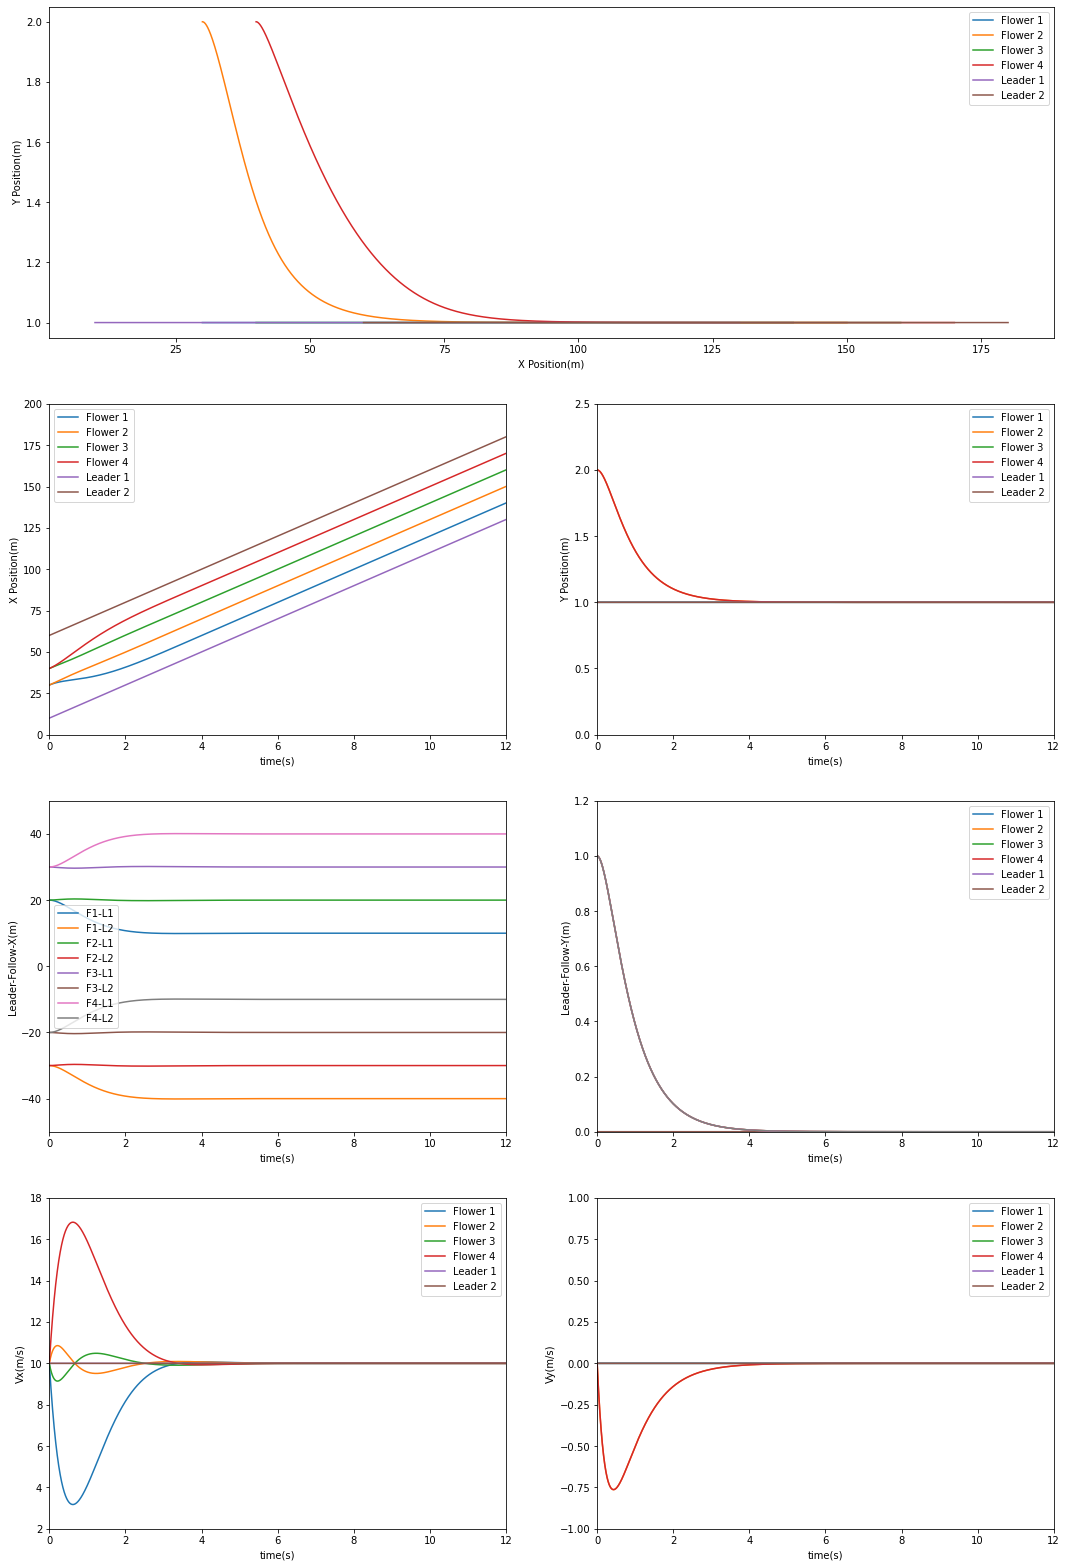

In [7]:
plt.figure(figsize=(18, 28))

plt.subplot(4, 1, 1)
for tag in range(0, 4):
    plt.plot([i[0] for i in [i[tag] for i in x_list]], [i[1] for i in [i[tag] for i in x_list]])
for tag in range(0, 2):
    plt.plot([i[0] for i in [i[tag] for i in xL_list]], [i[1] for i in [i[tag] for i in xL_list]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlabel("X Position(m)")
plt.ylabel("Y Position(m)")

plt.subplot(4, 2, 8)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [i[tag] for i in v_list]])
for tag in range(0, 2):
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [i[tag] for i in vL_list]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlim((0, 12))
plt.ylim((-1, 1))
plt.xlabel("time(s)")
plt.ylabel("Vy(m/s)")

plt.subplot(4, 2, 7)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [i[tag] for i in v_list]])
for tag in range(0, 2):
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [i[tag] for i in vL_list]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlim((0, 12))
plt.ylim((2, 18))
plt.xlabel("time(s)")
plt.ylabel("Vx(m/s)")

plt.subplot(4, 2, 5)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [x[tag] - L[0] for x, L in zip(x_list, xL_list)]])
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [x[tag] - L[1] for x, L in zip(x_list, xL_list)]])
plt.legend(["F1-L1", "F1-L2", "F2-L1", "F2-L2", "F3-L1", "F3-L2", "F4-L1", "F4-L2"])
plt.xlim((0, 12))
plt.ylim((-50, 50))
plt.xlabel("time(s)")
plt.ylabel("Leader-Follow-X(m)")

plt.subplot(4, 2, 6)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [x[tag] - L[0] for x, L in zip(x_list, xL_list)]])
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [x[tag] - L[1] for x, L in zip(x_list, xL_list)]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlim((0, 12))
plt.ylim((0, 1.2))
plt.xlabel("time(s)")
plt.ylabel("Leader-Follow-Y(m)")

plt.subplot(4, 2, 3)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [i[tag] for i in x_list]])
for tag in range(0, 2):
    plt.plot([i * step for i in range(times + 1)], [i[0] for i in [i[tag] for i in xL_list]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlim((0, 12))
plt.ylim((0, 200))
plt.xlabel("time(s)")
plt.ylabel("X Position(m)")

plt.subplot(4, 2, 4)
for tag in range(0, 4):
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [i[tag] for i in x_list]])
for tag in range(0, 2):
    plt.plot([i * step for i in range(times + 1)], [i[1] for i in [i[tag] for i in xL_list]])
plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
plt.xlim((0, 12))
plt.ylim((0, 2.5))
plt.xlabel("time(s)")
plt.ylabel("Y Position(m)")
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


0.0%
0.0%
0.5%
1.0%
1.5%
2.0%
2.5%
3.0%
3.5%
4.0%
4.5%
5.0%
5.5%
6.0%
6.5%
7.0%
7.5%
8.0%
8.5%
9.0%
9.5%
10.0%
10.5%
11.0%
11.5%
12.0%
12.5%
13.0%
13.5%
14.0%
14.5%
15.0%
15.5%
16.0%
16.5%
17.0%
17.5%
18.0%
18.5%
19.0%
19.5%
20.0%
20.5%
21.0%
21.5%
22.0%
22.5%
23.0%
23.5%
24.0%
24.5%
25.0%
25.5%
26.0%
26.5%
27.0%
27.5%
28.0%
28.5%
29.0%
29.5%
30.0%
30.5%
31.0%
31.5%
32.0%
32.5%
33.0%
33.5%
34.0%
34.5%
35.0%
35.5%
36.0%
36.5%
37.0%
37.5%
38.0%
38.5%
39.0%
39.5%
40.0%
40.5%
41.0%
41.5%
42.0%
42.5%
43.0%
43.5%
44.0%
44.5%
45.0%
45.5%
46.0%
46.5%
47.0%
47.5%
48.0%
48.5%
49.0%
49.5%
50.0%
50.5%
51.0%
51.5%
52.0%
52.5%
53.0%
53.5%
54.0%
54.5%
55.0%
55.5%
56.0%
56.5%
57.0%
57.5%
58.0%
58.5%
59.0%
59.5%
60.0%


IndexError: list index out of range

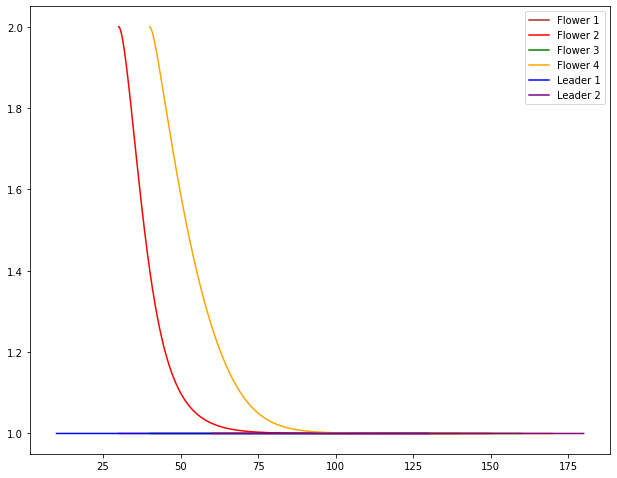

In [8]:
import matplotlib.animation as ani


color = ['brown','red','green','orange','blue','purple']
def chart_func(time):
    plt.cla()
    for tag in range(0, 4):
        plt.plot([i[0] for i in [i[tag] for i in x_list[:time * 100]]], [i[1] for i in [i[tag] for i in x_list[:time * 100]]],c=color[tag])
    for tag in range(0, 2):
        plt.plot([i[0] for i in [i[tag] for i in xL_list[:time * 100]]], [i[1] for i in [i[tag] for i in xL_list[:time * 100]]],c=color[tag+4])
    plt.legend(["Flower 1", "Flower 2", "Flower 3", "Flower 4", "Leader 1", "Leader 2"])
    for tag in range(0, 4):
        plt.plot(x_list[time*100][tag][0], x_list[time*100][tag][1],'>',c=color[tag], markersize=20)
    for tag in range(0, 2):
        plt.plot(xL_list[time*100][tag][0], xL_list[time*100][tag][1],'>',c=color[tag+4], markersize=20)
    plt.xlabel("X Position(m)")
    plt.ylabel("Y Position(m)")
    plt.xlim((0,200))
    plt.ylim((0.8,2))
    plt.tight_layout()
    print(str(time/2) + "%")

fig = plt.figure(figsize=(9,7))
an = ani.FuncAnimation(fig, chart_func, 200)
an.save("chart.gif")